In [3]:
import pandas as pd
import numpy as np


In [4]:
df=pd.read_csv('spam.csv')

In [5]:
df.shape

(5572, 2)

In [7]:
df.head(10)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
df.tail(10)


,Category,Message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


Data Cleaning.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
df['target']=encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.duplicated().sum()

415

In [23]:
df=df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

EDA.

In [25]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

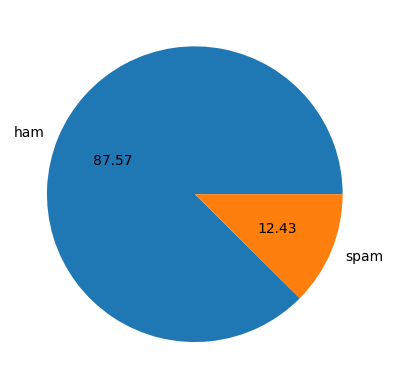

In [26]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
df['no_characters']=df['text'].apply(len)

In [31]:
df.head()

,target,text,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
df['no_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df['no_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,text,no_characters,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df[['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Ham texts.

In [41]:
df[df['target']==0][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


Spam texts.

In [42]:
df[df['target']==1][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [43]:
import seaborn as sns


<Axes: xlabel='no_characters', ylabel='Count'>

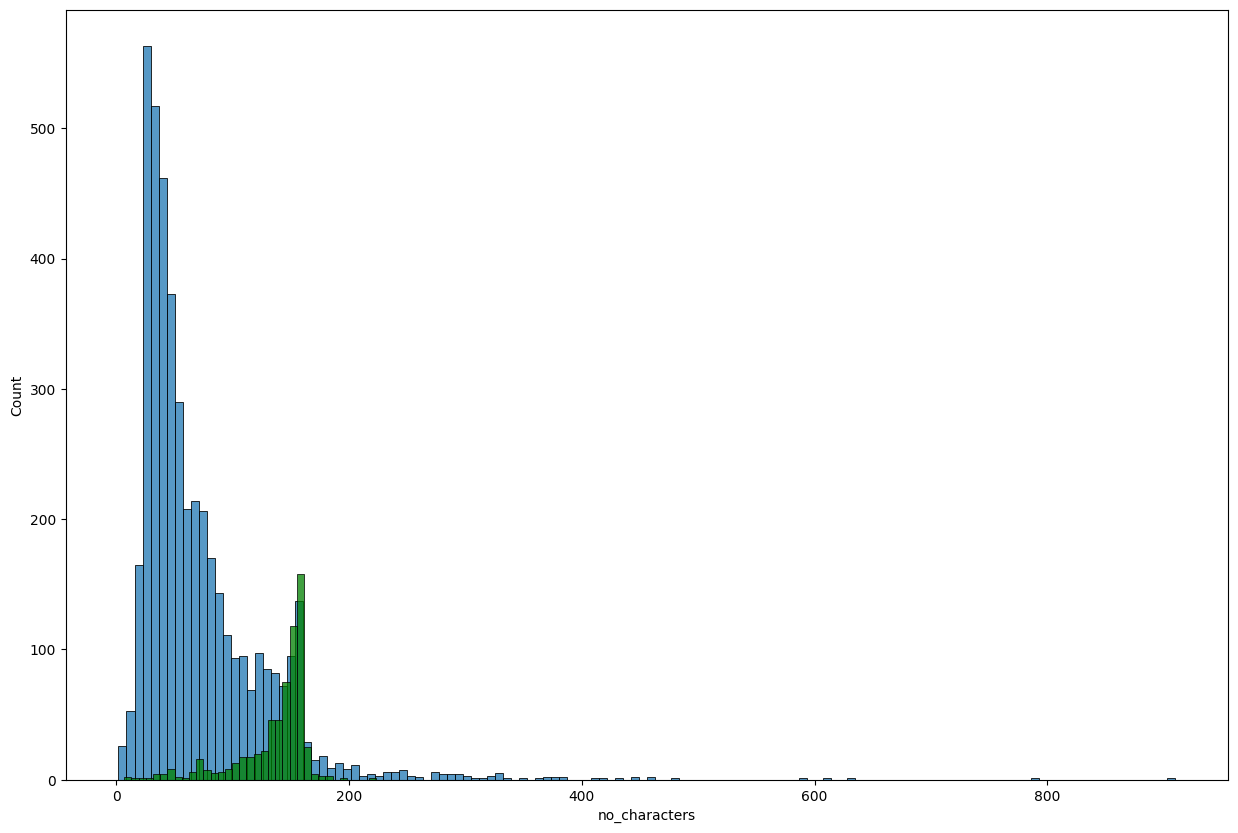

In [47]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['no_characters'])
sns.histplot(df[df['target']==1]['no_characters'],color='green')

Data (text) preprocessing

In [70]:
def tranforms(text):  # tranforms means transforms
  text=text.lower()
  text=nltk.word_tokenize(text)
  o=[]
  for i in text:
    if i.isalnum():
      o.append(i)
  text=o[:]
  o.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      o.append(i)
  text=o[:]
  o.clear()
  for i in text:
    o.append(p.stem(i))

  return " ".join(o)

In [60]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Example.


In [71]:
tranforms('HI,### where raktim laughing')

'hi raktim laugh'

In [69]:
from nltk.stem.porter import PorterStemmer
p=PorterStemmer()
p.stem('laughing')


'laugh'

In [76]:
df['transformed']=df['text'].apply(tranforms)

In [77]:
df.head()

,target,text,no_characters,no_words,no_sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [81]:
from wordcloud import WordCloud
w=WordCloud(width=500,height=650,min_font_size=10,background_color='white')

In [82]:
spamw=w.generate(df[df['target']==1]['transformed'].str.cat(sep=" "))

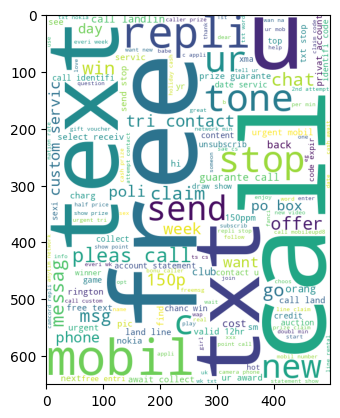

In [83]:
plt.imshow(spamw)

In [84]:
hamw=w.generate(df[df['target']==0]['transformed'].str.cat(sep=" "))

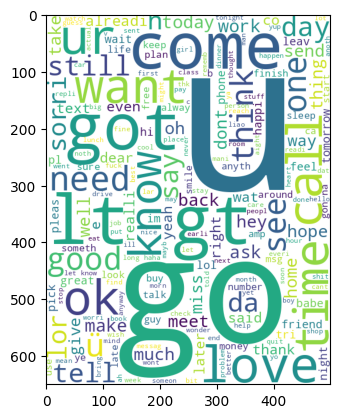

In [85]:
plt.imshow(hamw)

Model Building.

In [116]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [117]:
x=tf.fit_transform(df['transformed']).toarray()
x
x.shape

(5157, 3000)

In [118]:
y=df['target'].values
y
y.shape

(5157,)

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)

In [121]:
from sklearn.naive_bayes import  GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [122]:
g=GaussianNB()
m=MultinomialNB()
b=BernoulliNB()

GaussianNB.

In [112]:
g.fit(xtrain,ytrain)
y_pred1=g.predict(xtest)

In [123]:
print(accuracy_score(ytest,y_pred1))
print(confusion_matrix(ytest,y_pred1))
print(precision_score(ytest,y_pred1))

0.8697674418604651
[[981 147]
 [ 21 141]]
0.4895833333333333


MultinomialNB

In [124]:
m.fit(xtrain,ytrain)
y_pred2=m.predict(xtest)
print(accuracy_score(ytest,y_pred2))
print(confusion_matrix(ytest,y_pred2))
print(precision_score(ytest,y_pred2))

0.9736434108527132
[[1128    0]
 [  34  128]]
1.0


BernoulliNB

In [125]:
b.fit(xtrain,ytrain)
y_pred3=b.predict(xtest)
print(accuracy_score(ytest,y_pred3))
print(confusion_matrix(ytest,y_pred3))
print(precision_score(ytest,y_pred3))

0.9844961240310077
[[1125    3]
 [  17  145]]
0.9797297297297297


In [126]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(m,open('model.pkl','wb'))